In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv("Avm_Musterileri.csv")
data.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


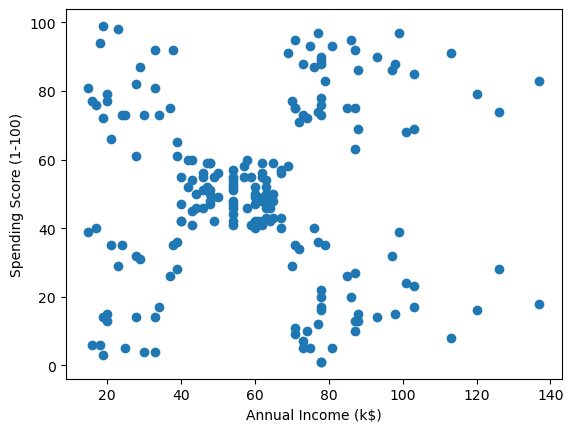

In [4]:
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [6]:
data.rename(columns={"Annual Income (k$)": "income"}, inplace=True)
data.rename(columns= {"Spending Score (1-100)": "score"},inplace=True)

In [7]:
#normalizing
scaler=MinMaxScaler()
scaler.fit(data[["income"]])
data["income"]= scaler.transform(data[["income"]])

scaler.fit(data[["score"]])
data["score"]=scaler.transform(data[["score"]])

data.head()

,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [13]:
k_range=range(1,11)
list_d=[]

for k in k_range:
    kmeans_model=KMeans(n_clusters=k)
    kmeans_model.fit(data[["income","score"]])
    list_d.append(kmeans_model.inertia_)

C:\Users\daphn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


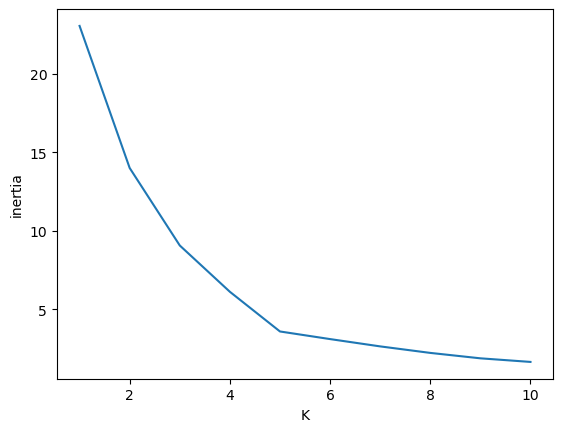

In [14]:
plt.xlabel("K")
plt.ylabel("inertia")
plt.plot(k_range,list_d)
plt.show()

In [15]:
#K=5
kmeans_model=KMeans(n_clusters=5)
y_predict=kmeans_model.fit_predict(data[["income","score"]])
y_predict

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [16]:
data["cluster"]=y_predict
data.head()

,CustomerID,income,score,cluster
0,1,0.000000,0.387755,4
1,2,0.000000,0.816327,3
2,3,0.008197,0.051020,4
3,4,0.008197,0.775510,3
4,5,0.016393,0.397959,4


In [18]:
kmeans_model.cluster_centers_

array([[0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894],
       [0.09265859, 0.20319432]])

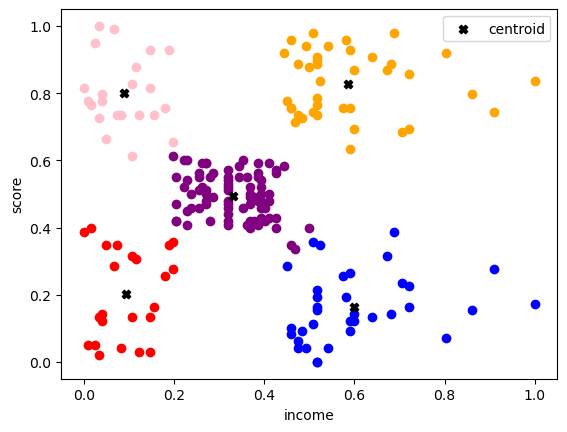

In [19]:
data1=data[data.cluster==0]
data2=data[data.cluster==1]
data3=data[data.cluster==2]
data4=data[data.cluster==3]
data5=data[data.cluster==4]

plt.xlabel("income")
plt.ylabel("score")
plt.scatter(data1["income"],data1["score"],color="purple")
plt.scatter(data2["income"],data2["score"],color="blue")
plt.scatter(data3["income"],data3["score"],color="orange")
plt.scatter(data4["income"],data4["score"],color="pink")
plt.scatter(data5["income"],data5["score"],color="red")

plt.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,1],color="black", marker="X",label="centroid")
plt.legend()
plt.show()